# Classification de genres musicaux

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploration des données

In [2]:
data = pd.read_csv("data/features_30_sec.csv", index_col="filename")
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
data.isnull().sum().sum()

0

In [4]:
data['label'].unique() # 10 genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Pas de données manquantes bien évidemment

In [5]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


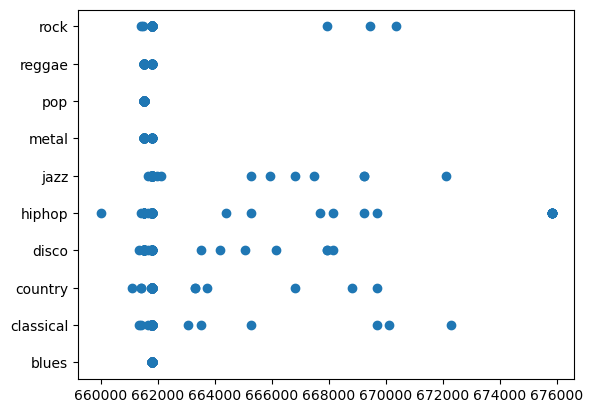

In [6]:
plt.scatter(data['length'], data['label'])

## Splitting

In [7]:
X, y = data.drop(['length', 'label'], axis=1).to_numpy(), data['label'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class PolynomialTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, include_bias=True):
        """
        Transformateur personnalisé pour ajouter uniquement les puissances individuelles.
        
        Parameters:
        - degree (int): Degré maximal des puissances à générer.
        - include_bias (bool): Si True, ajoute une colonne de biais (1).
        """
        self.degree = degree
        self.include_bias = include_bias

    def fit(self, X, y=None):
        # Rien à apprendre ici, retourne simplement l'instance
        return self

    def transform(self, X):
        """
        Applique la transformation pour générer des puissances individuelles.
        """
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        
        # Générer les puissances
        powers = [X**i for i in range(1, self.degree + 1)]
        X_transformed = np.hstack(powers)
        
        # Ajouter le biais si nécessaire
        if self.include_bias:
            bias = np.ones((X.shape[0], 1))
            X_transformed = np.hstack([bias, X_transformed])
        
        return X_transformed


In [10]:
pd.DataFrame(PolynomialTransformer(degree=3, include_bias=False).fit_transform(X_test))

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.395407,0.090621,0.116579,0.001520,1777.839586,330193.868576,2173.800933,151560.984240,3821.177641,1.441895e+06,...,-0.286754,5.099827e+04,-339.188835,173339.726021,-14.362483,23506.739382,-1.648179,2.079223e+04,-5.536181e+01,4.569989e+04
1,0.250492,0.090480,0.110509,0.003491,1336.153705,79907.295110,1554.249504,37204.779247,2751.820122,4.866422e+05,...,-3.059470,1.517499e+06,0.485068,277531.435494,-0.065777,279638.186044,-12.828473,4.187302e+05,-8.149193e+00,3.547215e+05
2,0.435302,0.082635,0.143163,0.001065,2789.486477,373290.877657,2795.819855,173281.566427,6113.356305,1.839723e+06,...,-4.039685,5.079470e+04,18.124845,33004.653373,14.241083,75781.338714,64.902918,6.191303e+04,5.963912e+01,9.002354e+04
3,0.322393,0.086365,0.080559,0.001165,1481.568587,283211.662057,1412.025522,55694.215657,2657.352145,7.853093e+05,...,-262.485117,1.767412e+05,-24.131276,302353.102406,-114.657550,224186.087471,-204.001653,1.127363e+06,-7.586385e+02,1.045288e+06
4,0.410039,0.088842,0.139203,0.002202,2026.298986,575184.204476,2398.102837,155401.937825,4462.743857,3.048074e+06,...,0.025811,1.001317e+05,-12.820161,65664.406573,0.054150,131670.075578,0.758968,9.176760e+04,-8.667756e-02,4.946326e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.370623,0.080463,0.075741,0.000366,3029.382383,215849.559866,2829.048804,64688.064353,6201.978842,1.046685e+06,...,-1.686926,9.243883e+04,-1.206907,516738.665495,-247.530243,448510.677848,-156.168114,2.742412e+05,-1.152167e+02,5.571326e+05
296,0.305175,0.080065,0.120560,0.000325,2428.928767,97719.368632,2286.710780,24997.757809,5064.932456,2.318504e+05,...,279.434935,6.340662e+04,-1276.753138,48009.474512,36.650662,69720.175428,-236.787168,7.661097e+04,2.714116e+01,6.533399e+04
297,0.321170,0.087852,0.055436,0.001231,857.638582,285170.859067,1238.029736,170818.132853,1443.765464,1.566617e+06,...,-93.564809,8.163043e+04,-1.156350,264009.721295,-97.060468,287993.495213,-23.569055,7.651621e+04,-1.110396e+01,9.691719e+04
298,0.276245,0.097367,0.101321,0.003951,1309.382408,756062.612347,1883.042903,284143.663735,2763.186256,4.687547e+06,...,-3865.342490,1.621458e+05,-1315.557310,231297.681932,-1287.835281,92251.570818,-6333.632542,1.745470e+05,-6.987418e+03,4.277192e+05


## Pré-traitement + Modélisation

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
feature_selector = SelectKBest(f_classif, k=500)

def make_pipeline(model):
    return Pipeline([
        ('poly', poly_features),
        ('scaler', scaler),
        ('feat_select', feature_selector),
        ('model', model),
    ])



def fit_and_evaluate(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    print(type(clf['model']).__name__)    
    clf.fit(X_train, y_train)

    print("Classification report on train set\n", classification_report(y_true=y_train, y_pred=clf.predict(X_train)))
    print("Classification report on test set\n", classification_report(y_true=y_test, y_pred=clf.predict(X_test)))

In [13]:
log_clf = make_pipeline(LogisticRegression(class_weight='balanced', max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=1))
fit_and_evaluate(log_clf)

LogisticRegression
Classification report on train set
               precision    recall  f1-score   support

       blues       0.92      0.97      0.94        70
   classical       0.99      1.00      0.99        70
     country       0.97      0.96      0.96        70
       disco       0.94      0.93      0.94        70
      hiphop       0.97      0.97      0.97        70
        jazz       0.99      0.99      0.99        70
       metal       0.99      0.97      0.98        70
         pop       0.94      0.96      0.95        70
      reggae       0.93      0.94      0.94        70
        rock       0.91      0.86      0.88        70

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

Classification report on test set
               precision    recall  f1-score   support

       blues       0.85      0.73      0.79        30
   classical       0.97      0.97      0.9

In [14]:
from sklearn.svm import LinearSVC

svc = make_pipeline(
    LinearSVC(dual='auto', C=0.08, max_iter=10000)
)

fit_and_evaluate(svc)

LinearSVC
Classification report on train set
               precision    recall  f1-score   support

       blues       1.00      0.99      0.99        70
   classical       0.99      1.00      0.99        70
     country       0.96      0.99      0.97        70
       disco       0.96      0.97      0.96        70
      hiphop       1.00      0.97      0.99        70
        jazz       1.00      0.99      0.99        70
       metal       0.99      0.99      0.99        70
         pop       0.99      0.99      0.99        70
      reggae       1.00      0.99      0.99        70
        rock       0.94      0.96      0.95        70

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700

Classification report on test set
               precision    recall  f1-score   support

       blues       0.88      0.77      0.82        30
   classical       0.94      0.97      0.95        

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = make_pipeline(
    GradientBoostingClassifier(
        learning_rate=0.01,  
        n_estimators=100,    # Nombre d'arbres
        max_depth=3,         
        subsample=0.9  
    )
)

fit_and_evaluate(gb_clf)

GradientBoostingClassifier
Classification report on train set
               precision    recall  f1-score   support

       blues       0.99      0.96      0.97        70
   classical       1.00      0.99      0.99        70
     country       0.93      0.99      0.96        70
       disco       0.89      0.97      0.93        70
      hiphop       0.94      0.94      0.94        70
        jazz       0.93      1.00      0.97        70
       metal       0.99      0.96      0.97        70
         pop       0.98      0.93      0.96        70
      reggae       0.96      0.91      0.93        70
        rock       0.93      0.89      0.91        70

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

Classification report on test set
               precision    recall  f1-score   support

       blues       0.73      0.53      0.62        30
   classical       0.88      0.93 

## Sélection du modèle et sauvegarde

In [16]:
# On garde les deux modèles linéaires et on les entraine sur l'intégralité des données
log_clf.fit(X, y)
svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('feat_select', SelectKBest(k=500)),
                ('model', LinearSVC(C=0.08, dual='auto', max_iter=10000))])

In [18]:
import joblib
                                                
# joblib.dump(lb_encoder, 'output/label_encoder.joblib')
joblib.dump(log_clf, 'output/log_clf_wl_full.joblib')
joblib.dump(svc, 'output/linSVC_wl_full.joblib')

['output/linSVC_wl_full.joblib']